## Experiments on Maze 5x5

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from baselines.common import plot_util as pu
import os
import pandas as pd
import pickle as pkl
plt.style.use("seaborn")
% matplotlib inline

In [2]:
def plot_her(path):
    r = pd.read_csv(path + "/progress.csv")
    interval = 1
    plt.figure(dpi=80, figsize=[14, 8])
    plt.subplot(3, 2, 1)
    plt.plot(r.total_timesteps[::interval], r.succ_ratio[::interval])
    plt.title("succ_ratio")
    plt.subplot(3, 2, 2)
    plt.plot(r.total_timesteps[::interval], r.final_x_pos[::interval])
    plt.title("final_x_pos")
    plt.subplot(3, 2, 3)
    plt.plot(r.total_timesteps[::interval], r.her_entropy[::interval])
    plt.title("entropy")
    plt.subplot(3, 2, 4)
    plt.plot(r.total_timesteps[::interval], r.episode_length[::interval])
    plt.title("episode_length")
    plt.subplot(3, 2, 5)
    plt.plot(r.total_timesteps[::interval], r.int_rewards[::interval])
    plt.title("int_rewards")
    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    return r

Text(0.5,1,'Maze 5x5')

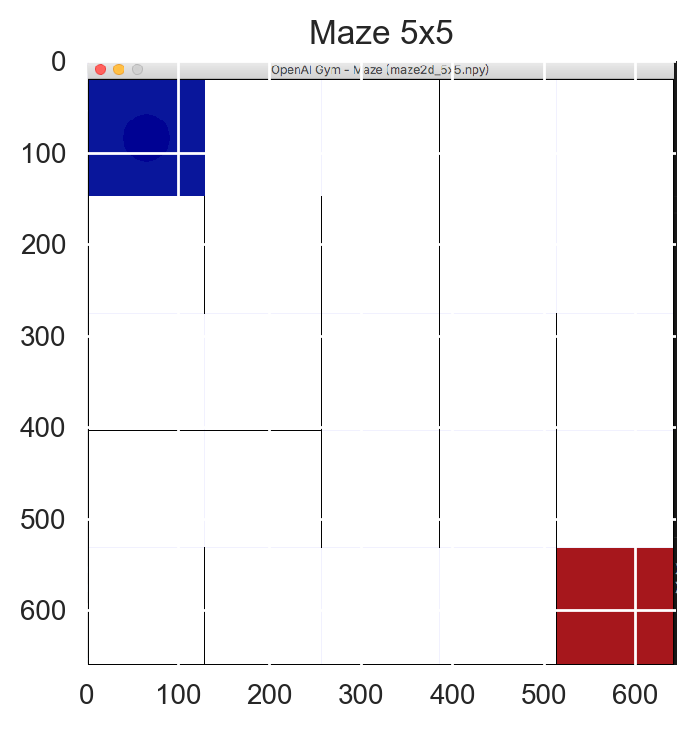

In [3]:
img = mpimg.imread("/Users/liziniu/Desktop/maze.png")
plt.figure(dpi=200)
plt.imshow(img)
plt.title("Maze 5x5")

In [4]:
print("Each step is given -0.1/maze_size unless it reaches the red block and get +1")

Each step is given -0.1/maze_size unless it reaches the red block and get +1


## Valllina Algorithm without Goal

In [5]:
def plot_maze(path):
    monitor = pd.read_csv(path + "/" + "0.0.monitor.csv",skiprows=1)
    plt.figure(dpi=70, figsize=[10, 8])
    plt.subplot(2, 2, 1)
    plt.plot(np.cumsum(monitor.l), pu.smooth(monitor.r, radius=5))
    plt.title("return")
    print("final return:{}".format(np.mean(monitor.r[-10:])))

    progress = pd.read_csv(path + "/" + "progress.csv")
    plt.subplot(2, 2, 2)
    if "acer" in path:
        plt.plot(progress.total_timesteps, progress.entropy)
    elif "ppo" in path:
        plt.plot(progress.total_timesteps, progress.policy_entropy)
    elif "her2" in path or "her" in path:
        plt.plot(progress.total_timesteps, progress.her_entropy)
    plt.title("entropy")
    
    plt.subplot(2, 2, 3)
    if "acer" in path:
        plt.plot(progress.total_timesteps, progress.explained_variance)
    elif "ppo" in path:
        plt.plot(progress.total_timesteps, progress.explained_variance)
    elif "her2" in path or "her" in path:
        plt.plot(progress.total_timesteps, progress.her_explained_variance)
    plt.title("explained_variance")
    plt.ylim([-2, 1.5])
    
    plt.subplot(2, 2, 4)
    plt.plot(np.cumsum(monitor.l), pu.smooth(monitor.l, radius=5))
    plt.title("epsiode_length")
    print("final epsiode length:{}".format(np.mean(monitor.l[-10:])))
    plt.yscale("log")
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    return progress

### ppo

#### 1e5 steps

final return:0.8443999999999999
final epsiode length:39.9


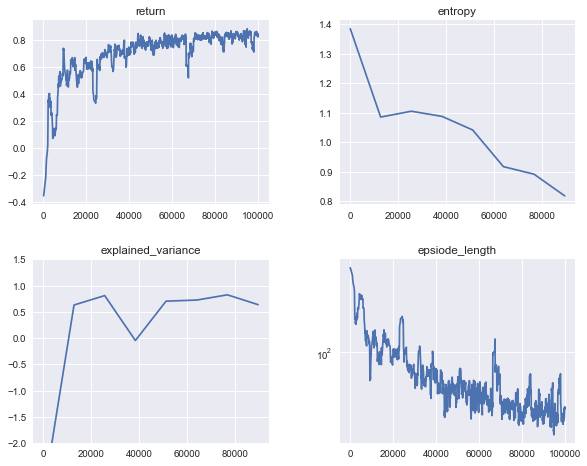

In [6]:
path = "/Users/liziniu/maze/logs/ppo/2019-05-10-14-58-10-466083"
progress = plot_maze(path)

### acer

#### 1e5 steps, ent_coef=0.01

final return:0.7756000000000001
final epsiode length:57.1


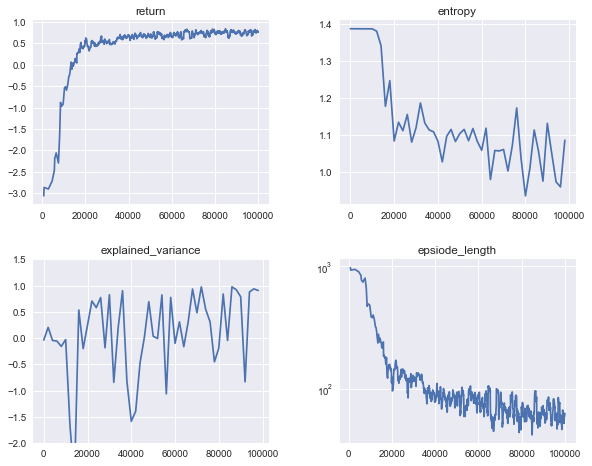

In [7]:
path = "/Users/liziniu/maze/logs/acer2/2019-05-10-15-00-16-615320"
progress = plot_maze(path)

#### 1e5 steps, ent_coef=0.0

final return:0.7484000000000001
final epsiode length:63.9


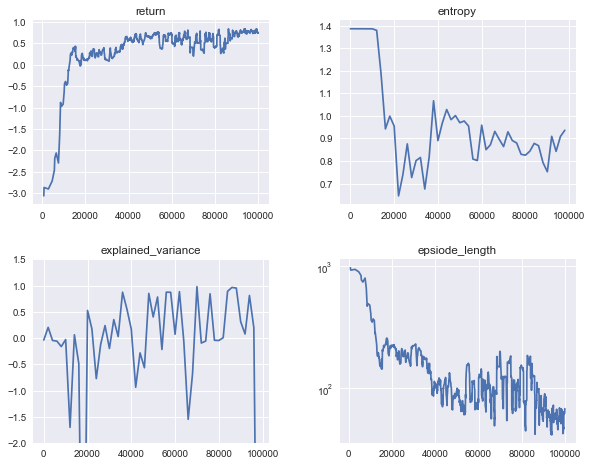

In [8]:
path = "/Users/liziniu/maze/logs/acer2/2019-05-16-17-03-59-688122"
progress = plot_maze(path)

#### 2e5 steps

final return:0.8732000000000001
final epsiode length:32.7


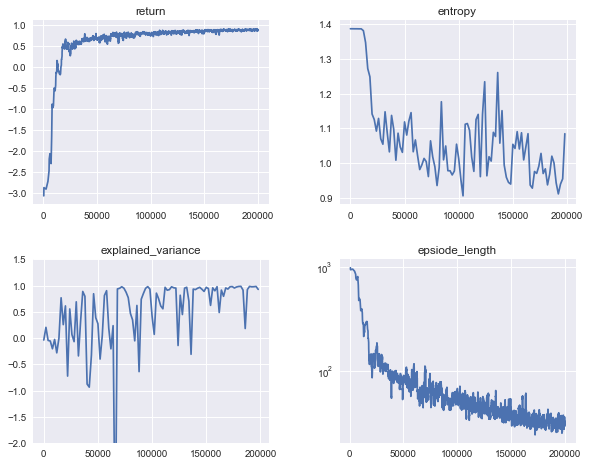

In [9]:
path = "/Users/liziniu/maze/logs/acer2/2019-05-10-15-28-59-377709"
progress = plot_maze(path)

## Our Method

###  No her

#### 1e5 steps, buffer=1

final return:0.9252
final epsiode length:19.7


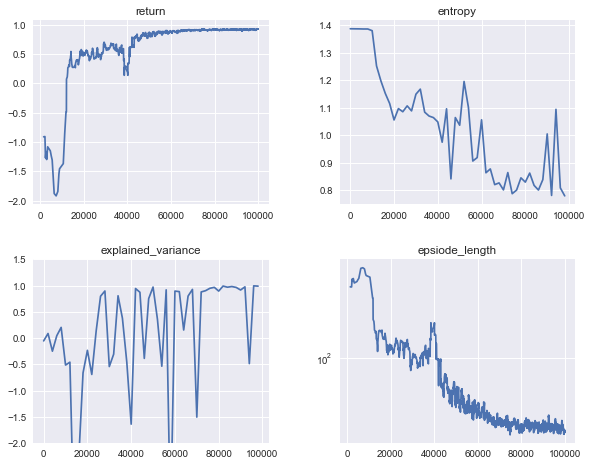

In [10]:
# this results shold be exactly same with 4.1.1
path = "/Users/liziniu/maze/logs/her2/no_her/2019-05-10-20-42-30-627736"
progress = plot_maze(path)

### With Her

#### 1e5 steps buffer=2, revise=True, replay_k=1

final return:0.8984000000000002
final epsiode length:26.4


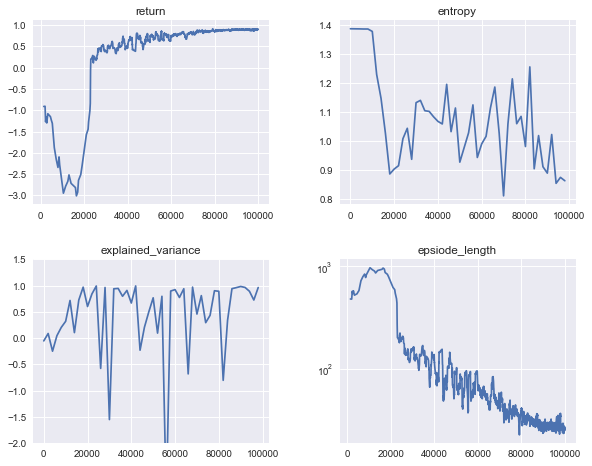

In [11]:
path = "/Users/liziniu/maze/logs/her2/her/2019-05-16-13-44-24-321174"
progress = plot_maze(path)

#### 1e5 steps buffer=2, revise=True, replay_k=2

final return:0.908
final epsiode length:24.0


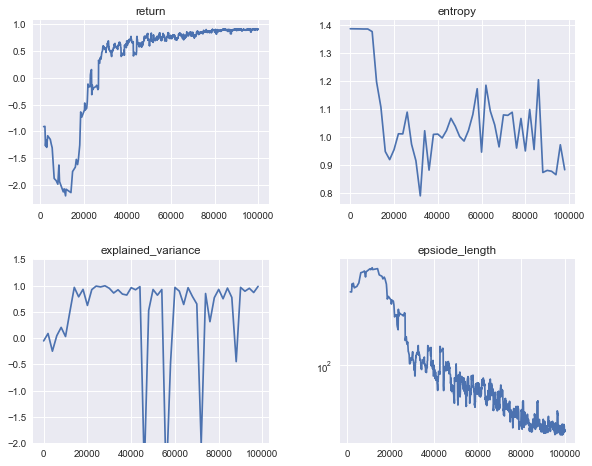

In [12]:
path = "/Users/liziniu/maze/logs/her2/her/2019-05-16-13-51-03-511903"
progress = plot_maze(path)

#### 1e5 steps buffer=2, revise=True, replay_k=3

final return:0.9076000000000001
final epsiode length:24.1


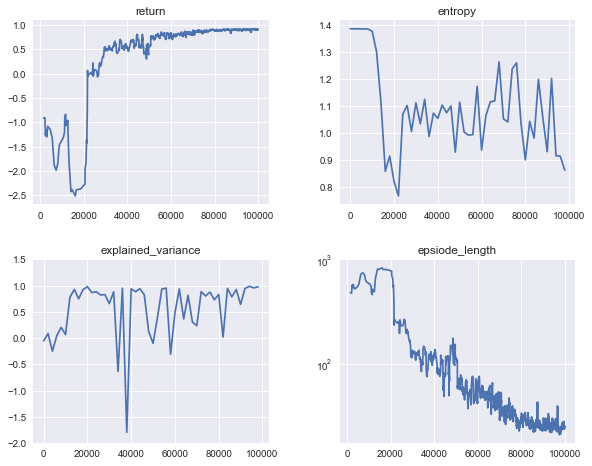

In [13]:
path = "/Users/liziniu/maze/logs/her2/her/2019-05-16-13-55-22-713774"
progress = plot_maze(path)

#### 1e5 steps buffer=2, revise=True, replay_k=4

final return:0.9119999999999999
final epsiode length:23.0


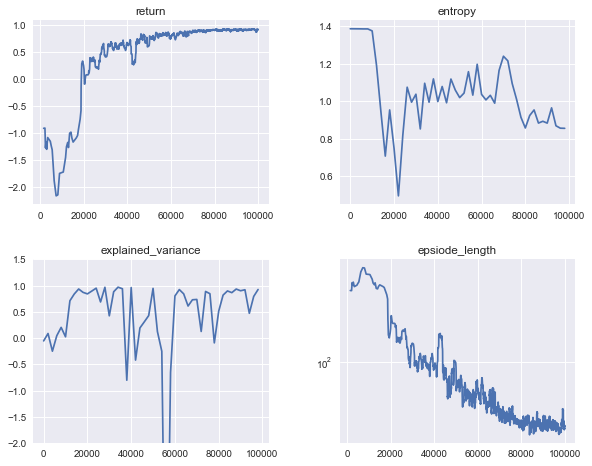

In [14]:
path = "/Users/liziniu/maze/logs/her2/her/2019-05-16-14-00-56-635282"
progress = plot_maze(path)

#### 1e5 steps buffer=2, revise=False

final return:-8.0
final epsiode length:2000.0


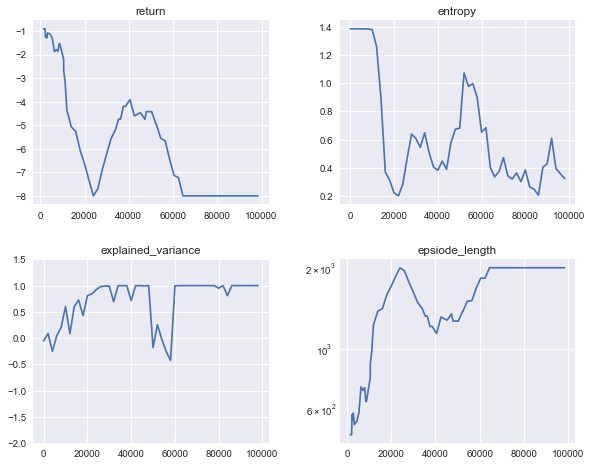

In [15]:
path = "/Users/liziniu/maze/logs/her2/her/2019-05-12-14-01-39-101584"
progress = plot_maze(path)

### 5e5 steps 10x10 Maze

final return:-2.6181
final epsiode length:3619.1


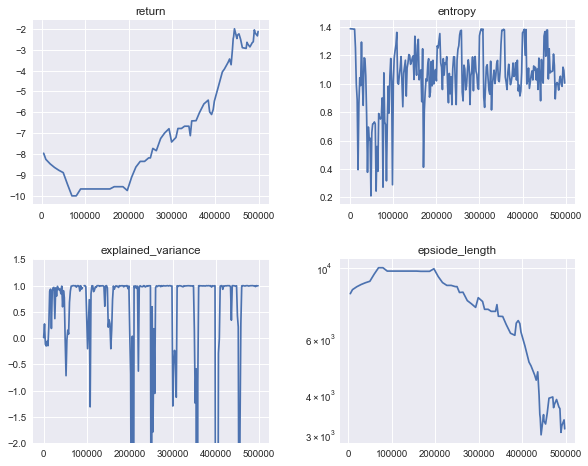

In [16]:
path = "/Users/liziniu/maze/logs/her2/her/2019-05-13-15-21-38-696110"
progress = plot_maze(path)

#### 10x10, replay_k=5

final return:-10.0
final epsiode length:10000.0


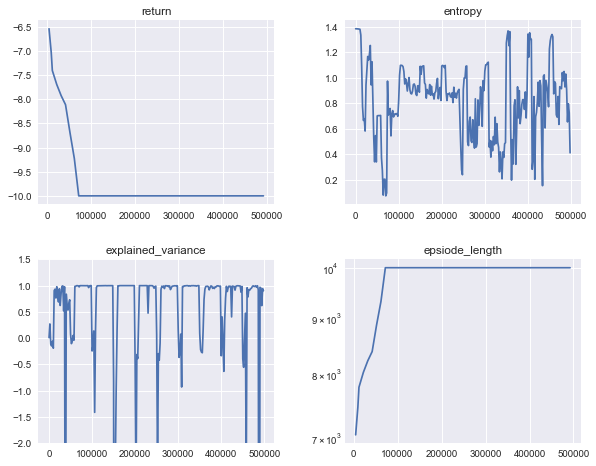

In [17]:
path = "/Users/liziniu/maze/logs/her2/her/2019-05-16-15-02-22-255900"
progress = plot_maze(path)

#### 10x10, replay_k=4

final return:-4.236
final epsiode length:5036.8


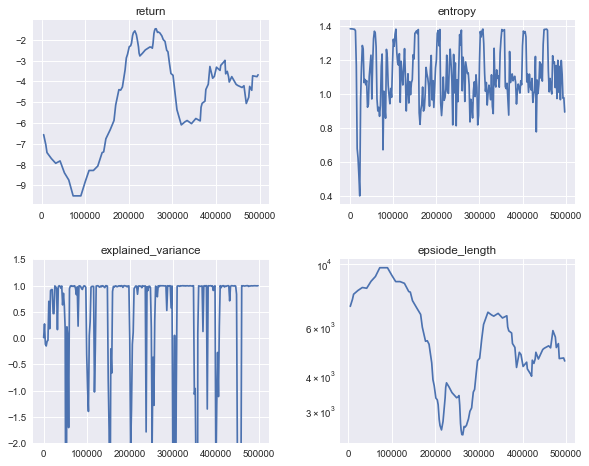

In [18]:
path = "/Users/liziniu/maze/logs/her2/her/2019-05-16-14-08-40-889169"
progress = plot_maze(path)

#### 10x10, replay_k=3

final return:-5.7077
final epsiode length:6308.3


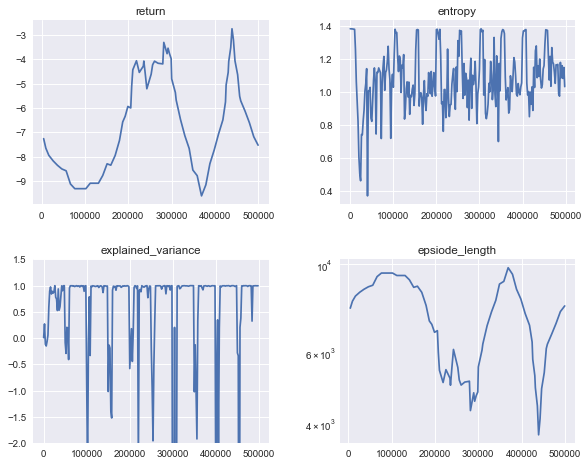

In [19]:
path = "/Users/liziniu/maze/logs/her2/her/2019-05-16-15-36-15-220817"
progress = plot_maze(path)

#### 10x10, replay_k=1

final return:-4.3574
final epsiode length:5258.3


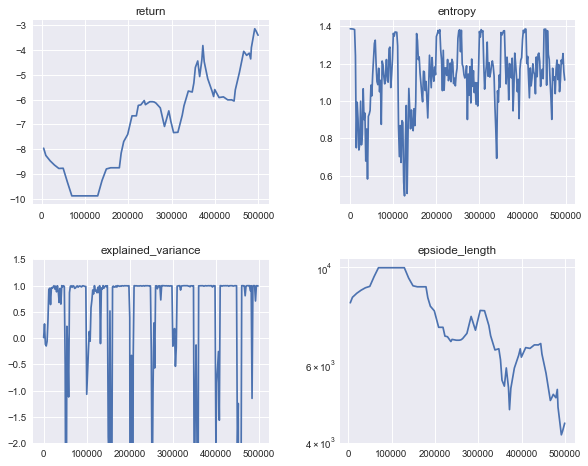

In [20]:
path = "/Users/liziniu/maze/logs/her2/her/2019-05-16-14-24-38-190968"
progress = plot_maze(path)

#### 10x10, replay_k = 0

final return:-5.2049
final epsiode length:6005.7


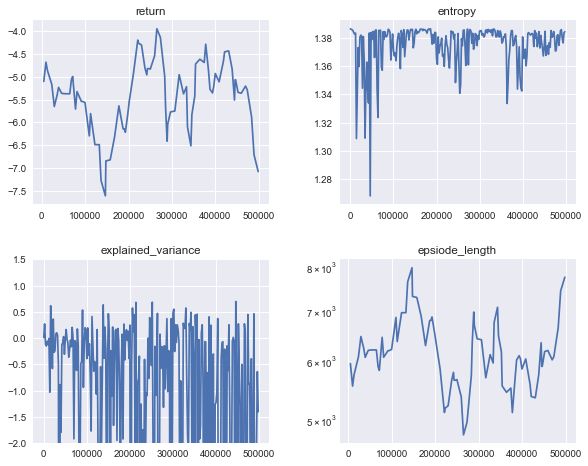

In [21]:
path = "/Users/liziniu/maze/logs/her2/her/2019-05-16-14-46-12-997598"
progress = plot_maze(path)

## Vallina Acer with Goal

### No her 

#### 1e5 steps, buffer=2

final return:0.9064
final epsiode length:24.4


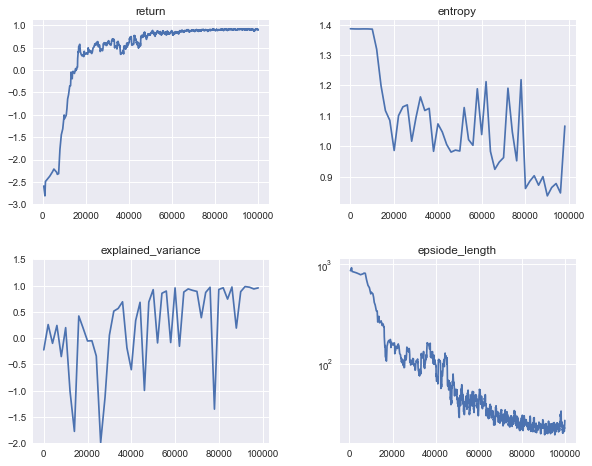

In [22]:
path = "/Users/liziniu/maze/logs/her/no_her/2019-05-10-20-46-52-570922"
progress = plot_maze(path)

### With Her

#### 1e5 steps, buffer=2

final return:-8.0
final epsiode length:2000.0
Note: vallina acer do not hold the assumption that next_goal=current_goal
Thus explained_variance is worse than 1.
As a contrast, pleases see Section3.2 .


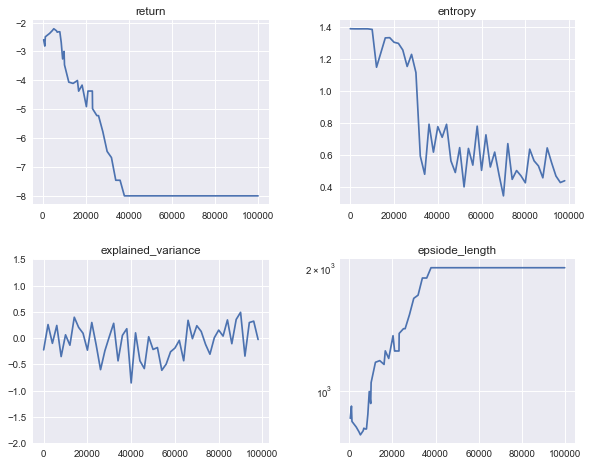

In [23]:
path = "/Users/liziniu/maze/logs/her/her/2019-05-10-21-02-20-440719"
progress = plot_maze(path)
print("Note: vallina acer do not hold the assumption that next_goal=current_goal")
print("Thus explained_variance is worse than 1.")
print("As a contrast, pleases see Section3.2 .")

#### 1e5 steps, buffer=2, revise=False

final return:-8.0
final epsiode length:2000.0
Note: vallina acer do not hold the assumption that next_goal=current_goal
Thus explained_variance is worse than 1.
As a contrast, pleases see Section3.2 .


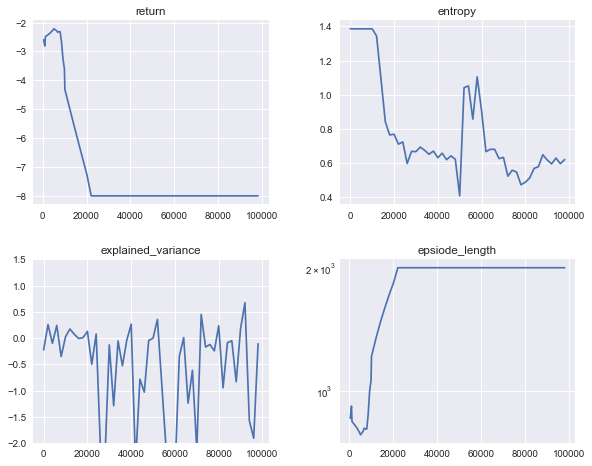

In [24]:
path = "/Users/liziniu/maze/logs/her/her/2019-05-12-14-14-30-902064"
progress = plot_maze(path)
print("Note: vallina acer do not hold the assumption that next_goal=current_goal")
print("Thus explained_variance is worse than 1.")
print("As a contrast, pleases see Section3.2 .")

## Yu's Method

### No her

#### 1e5 steps, version=1

final return:0.7860000000000001
final epsiode length:54.5


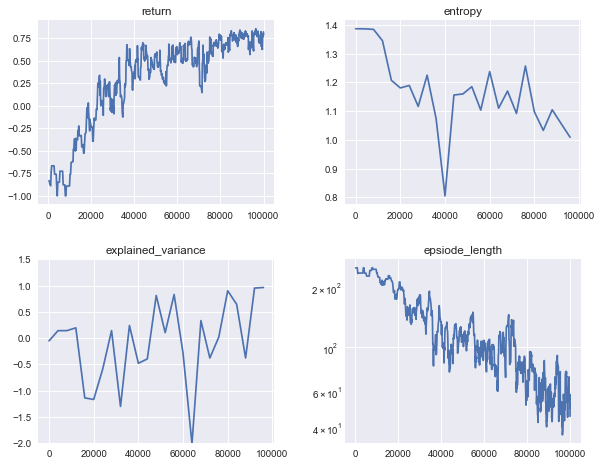

In [25]:
path = "/Users/liziniu/maze/logs/her3/no_her/2019-05-15-13-36-02-280653"
progress = plot_maze(path)

#### 1e5 steps, version=1

final return:0.9056
final epsiode length:24.6


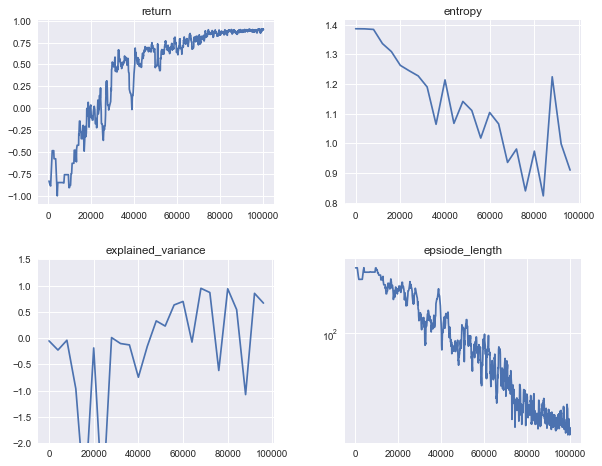

In [26]:
path = "/Users/liziniu/maze/logs/her3/no_her/2019-05-15-13-43-03-321773"
progress = plot_maze(path)

### 10x10 Maze,

#### no her

final return:-4.056100000000001
final epsiode length:4957.0


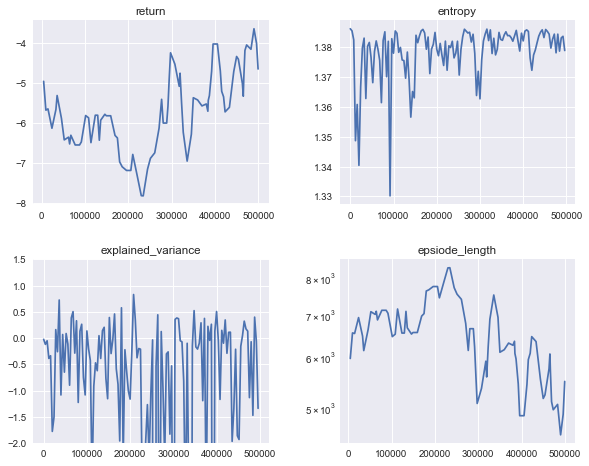

In [27]:
path = "/Users/liziniu/maze/logs/her3/no_her/2019-05-15-14-24-56-107143"
progress = plot_maze(path)

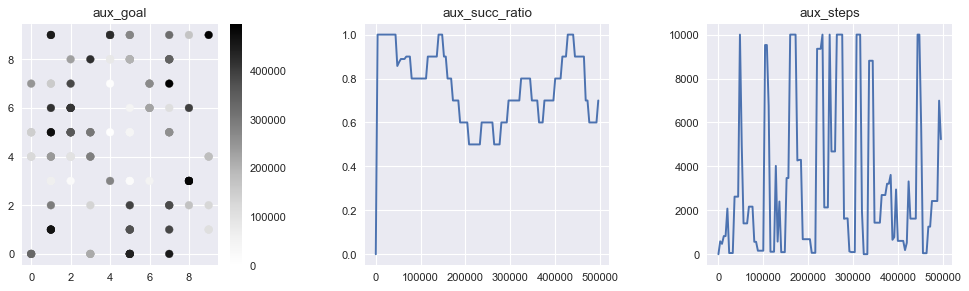

In [28]:
plt.figure(dpi=80, figsize=[15, 4])
plt.subplot(1, 3, 1)
plt.scatter(progress.aux_x, progress.aux_y, c=progress.total_timesteps)
plt.colorbar()
plt.title("aux_goal")
plt.subplot(1, 3, 2)
plt.plot(progress.total_timesteps, progress.aux_succ_ratio)
plt.title("aux_succ_ratio")
plt.subplot(1, 3, 3)
plt.plot(progress.total_timesteps, progress.real_step)
plt.title("aux_steps")
plt.subplots_adjust(wspace=0.4, hspace=0.2)

#### 10x10 Maze, new

final return:-3.7049999999999996
final epsiode length:4605.9


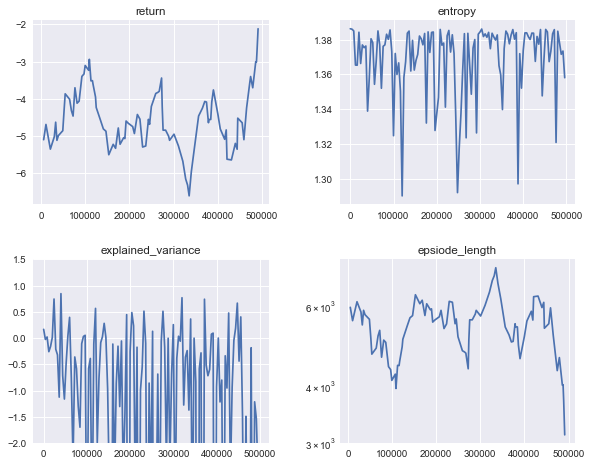

In [29]:
path = "/Users/liziniu/maze/logs/her3/no_her/2019-05-16-15-11-58-141387"
progress = plot_maze(path)

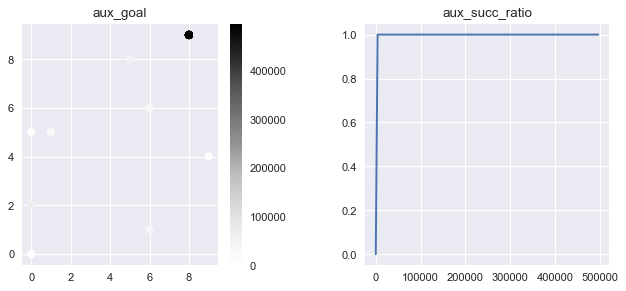

In [30]:
plt.figure(dpi=80, figsize=[15, 4])
plt.subplot(1, 3, 1)
plt.scatter(progress.aux_x, progress.aux_y, c=progress.total_timesteps)
plt.colorbar()
plt.title("aux_goal")
plt.subplot(1, 3, 2)
plt.plot(progress.total_timesteps, progress.aux_succ_ratio)
plt.title("aux_succ_ratio")
plt.subplots_adjust(wspace=0.4, hspace=0.2)

#### episode_length: 5000

final return:-3.71
final epsiode length:4110.4


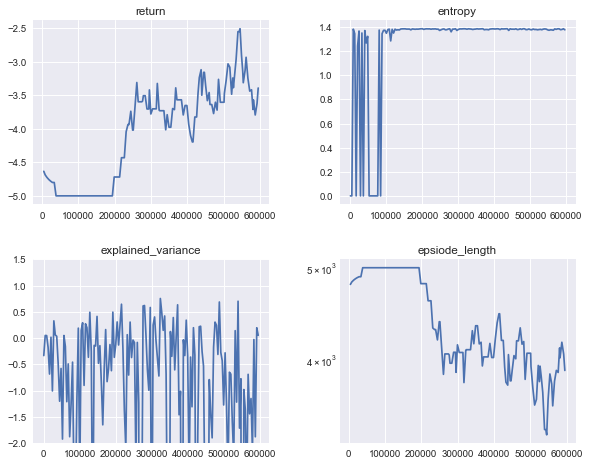

In [33]:
path = "/Users/liziniu/maze/logs/her3/no_her/2019-05-16-18-13-03-990286"
progress = plot_maze(path)

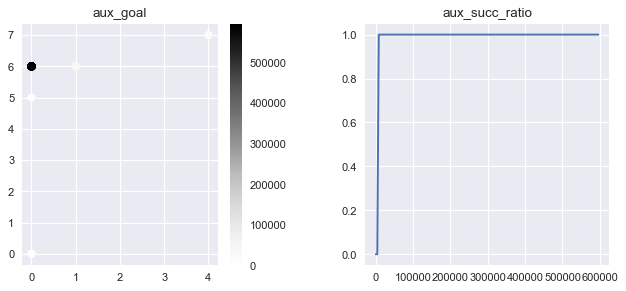

In [34]:
plt.figure(dpi=80, figsize=[15, 4])
plt.subplot(1, 3, 1)
plt.scatter(progress.aux_x, progress.aux_y, c=progress.total_timesteps)
plt.colorbar()
plt.title("aux_goal")
plt.subplot(1, 3, 2)
plt.plot(progress.total_timesteps, progress.aux_succ_ratio)
plt.title("aux_succ_ratio")
plt.subplots_adjust(wspace=0.4, hspace=0.2)

#### her

final return:-10.0
final epsiode length:10000.0


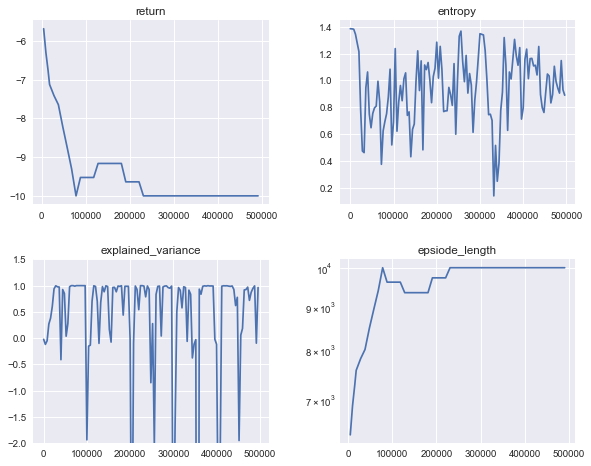

In [31]:
path = "/Users/liziniu/maze/logs/her3/her/2019-05-15-14-34-53-134300"
progress = plot_maze(path)

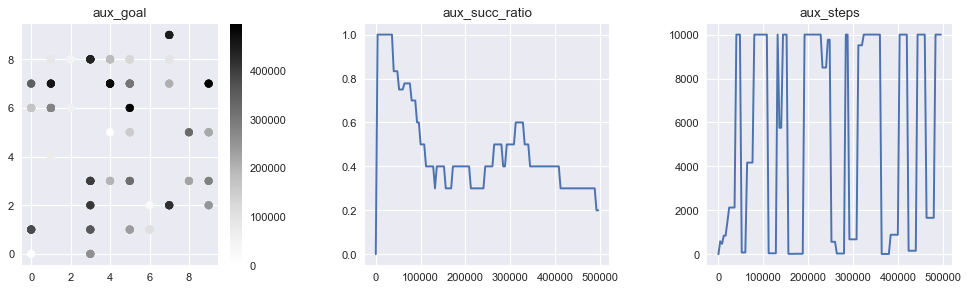

In [32]:
plt.figure(dpi=80, figsize=[15, 4])
plt.subplot(1, 3, 1)
plt.scatter(progress.aux_x, progress.aux_y, c=progress.total_timesteps)
plt.colorbar()
plt.title("aux_goal")
plt.subplot(1, 3, 2)
plt.plot(progress.total_timesteps, progress.aux_succ_ratio)
plt.title("aux_succ_ratio")
plt.subplot(1, 3, 3)
plt.plot(progress.total_timesteps, progress.real_step)
plt.title("aux_steps")
plt.subplots_adjust(wspace=0.4, hspace=0.2)